In [1]:
import re
import pandas as pd
import requests
import numpy as np
import seaborn as sns

In [2]:
deliveries = pd.read_csv(r"F:\Innomatics\Task-2\diminos_data_v2\deliveries.csv")
deliveries

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [3]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   order_id    1363008 non-null  int64 
 1   time_stamp  1363008 non-null  object
 2   status      1363008 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.2+ MB


In [4]:
order_items = pd.read_csv(r"F:\Innomatics\Task-2\diminos_data_v2\order_items.csv")
order_items

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"
...,...,...
454331,321684445,"['p_002', 'p_006', 'p_037']"
454332,321684446,"['p_015', 'p_013']"
454333,321684447,"['p_009', 'p_016']"
454334,321684448,"['p_007', 'p_003', 'p_037']"


In [5]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       454336 non-null  int64 
 1   items_ordered  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [6]:
orders = pd.read_csv(r"F:\Innomatics\Task-2\diminos_data_v2\orders.csv")
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         454336 non-null  int64 
 1   order_placed_at  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [8]:
products = pd.read_csv(r"F:\Innomatics\Task-2\diminos_data_v2\products.csv")
products

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385
5,p_006,Veg,Double Cheese Margherita,Large,619
6,p_007,Veg,Farm House,Regular,265
7,p_008,Veg,Farm House,Medium,469
8,p_009,Veg,Farm House,Large,705
9,p_010,Veg,Deluxe Veggie,Regular,219


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [10]:
deliveries["time_stamp"]=pd.to_datetime(deliveries["time_stamp"])

In [11]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   order_id    1363008 non-null  int64         
 1   time_stamp  1363008 non-null  datetime64[ns]
 2   status      1363008 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ MB


# What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [12]:
deliveries

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [13]:
deliveries["status"].unique()

array(['Pending', 'Out For Delivery', 'Delivered'], dtype=object)

In [14]:
df1 = deliveries.loc[deliveries["status"]== "Pending",("time_stamp","order_id")]
df1

,time_stamp,order_id
0,2020-12-11 00:01:29,321230114
3,2020-12-11 00:36:02,321230115
5,2020-12-11 00:55:01,321230116
8,2020-12-11 01:05:27,321230117
11,2020-12-11 01:14:20,321230118
...,...,...
1362987,2024-01-31 23:27:51,321684445
1362993,2024-01-31 23:36:08,321684447
1362994,2024-01-31 23:40:14,321684446
1363000,2024-01-31 23:55:46,321684449


In [15]:
df2 = deliveries.loc[deliveries["status"]== "Delivered",("time_stamp","order_id")]
df2

,time_stamp,order_id
2,2020-12-11 00:19:13.299151076,321230114
6,2020-12-11 00:59:18.054846609,321230115
10,2020-12-11 01:13:52.153042625,321230116
15,2020-12-11 01:22:44.430088094,321230117
17,2020-12-11 01:32:27.488575946,321230118
...,...,...
1362999,2024-01-31 23:50:06.640104742,321684443
1363001,2024-01-31 23:56:35.426400154,321684447
1363003,2024-01-31 23:58:08.494812502,321684446
1363006,2024-02-01 00:14:56.997433391,321684449


In [16]:
df=pd.merge(df1,df2 ,on ="order_id" )
df

,time_stamp_x,order_id,time_stamp_y
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076
1,2020-12-11 00:36:02,321230115,2020-12-11 00:59:18.054846609
2,2020-12-11 00:55:01,321230116,2020-12-11 01:13:52.153042625
3,2020-12-11 01:05:27,321230117,2020-12-11 01:22:44.430088094
4,2020-12-11 01:14:20,321230118,2020-12-11 01:32:27.488575946
...,...,...,...
454331,2024-01-31 23:27:51,321684445,2024-01-31 23:45:54.185192716
454332,2024-01-31 23:36:08,321684447,2024-01-31 23:56:35.426400154
454333,2024-01-31 23:40:14,321684446,2024-01-31 23:58:08.494812502
454334,2024-01-31 23:55:46,321684449,2024-02-01 00:14:56.997433391


In [17]:
df["time"] = df["time_stamp_y"]-df["time_stamp_x"]
df

,time_stamp_x,order_id,time_stamp_y,time
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,0 days 00:17:44.299151076
1,2020-12-11 00:36:02,321230115,2020-12-11 00:59:18.054846609,0 days 00:23:16.054846609
2,2020-12-11 00:55:01,321230116,2020-12-11 01:13:52.153042625,0 days 00:18:51.153042625
3,2020-12-11 01:05:27,321230117,2020-12-11 01:22:44.430088094,0 days 00:17:17.430088094
4,2020-12-11 01:14:20,321230118,2020-12-11 01:32:27.488575946,0 days 00:18:07.488575946
...,...,...,...,...
454331,2024-01-31 23:27:51,321684445,2024-01-31 23:45:54.185192716,0 days 00:18:03.185192716
454332,2024-01-31 23:36:08,321684447,2024-01-31 23:56:35.426400154,0 days 00:20:27.426400154
454333,2024-01-31 23:40:14,321684446,2024-01-31 23:58:08.494812502,0 days 00:17:54.494812502
454334,2024-01-31 23:55:46,321684449,2024-02-01 00:14:56.997433391,0 days 00:19:10.997433391


In [18]:
deliveries["time_stamp"].describe(include="all")

count                          1363008
mean     2022-07-16 10:01:28.293992448
min                2020-12-11 00:01:29
25%      2021-10-01 14:43:55.932578048
50%         2022-07-22 20:40:53.500000
75%      2023-04-30 13:31:50.020820224
max      2024-02-01 00:17:50.996900711
Name: time_stamp, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   time_stamp_x  454336 non-null  datetime64[ns] 
 1   order_id      454336 non-null  int64          
 2   time_stamp_y  454336 non-null  datetime64[ns] 
 3   time          454336 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 13.9 MB


In [20]:
df.describe()

,time_stamp_x,order_id,time_stamp_y,time
count,454336,4.543360e+05,454336,454336
mean,2022-07-16 09:52:55.342777088,3.214573e+08,2022-07-16 10:13:34.196423424,0 days 00:20:38.853646244
min,2020-12-11 00:01:29,3.212301e+08,2020-12-11 00:19:13.299151076,0 days 00:15:22.104888994
25%,2021-10-01 14:31:47.500000,3.213437e+08,2021-10-01 14:53:36.779902720,0 days 00:18:33.634059335
50%,2022-07-22 20:32:03,3.214573e+08,2022-07-22 20:53:43.539768064,0 days 00:19:58.899693726
75%,2023-04-30 13:20:03.500000,3.215709e+08,2023-04-30 13:40:20.885216256,0 days 00:21:58.782221573
max,2024-01-31 23:58:05,3.216844e+08,2024-02-01 00:17:50.996900711,0 days 01:02:54.724687723
std,NaN,1.311557e+05,NaN,0 days 00:03:00.459129376


In [21]:
df["time"].mean()

Timedelta('0 days 00:20:38.853646244')

In [22]:
#What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [23]:
delivery_99 = df.time.dt.total_seconds()
pern_99 = np.percentile(delivery_99, 99)
pern_99

1853.7254753299526

In [24]:
t = pern_99/60
t

30.895424588832544

In [25]:
df["time"]=df["time"].dt.total_seconds()/60

In [26]:
df

,time_stamp_x,order_id,time_stamp_y,time
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,17.738319
1,2020-12-11 00:36:02,321230115,2020-12-11 00:59:18.054846609,23.267581
2,2020-12-11 00:55:01,321230116,2020-12-11 01:13:52.153042625,18.852551
3,2020-12-11 01:05:27,321230117,2020-12-11 01:22:44.430088094,17.290501
4,2020-12-11 01:14:20,321230118,2020-12-11 01:32:27.488575946,18.124810
...,...,...,...,...
454331,2024-01-31 23:27:51,321684445,2024-01-31 23:45:54.185192716,18.053087
454332,2024-01-31 23:36:08,321684447,2024-01-31 23:56:35.426400154,20.457107
454333,2024-01-31 23:40:14,321684446,2024-01-31 23:58:08.494812502,17.908247
454334,2024-01-31 23:55:46,321684449,2024-02-01 00:14:56.997433391,19.183291


In [27]:
#Which metric is the better choice to determine the stores performance based on Delivery Time?

In [28]:
95 or 99 percentile

SyntaxError: invalid syntax (402066011.py, line 1)

In [29]:
#What is the order id with the maximum delivery time?

In [30]:
d = df['time'].max()

In [31]:
d

62.912078128716665

In [32]:
df.loc[df['time']==62.912078128716665]

,time_stamp_x,order_id,time_stamp_y,time
398939,2023-09-21 15:49:55,321629049,2023-09-21 16:52:49.724687723,62.912078


In [33]:
#How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?


In [34]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         454336 non-null  int64 
 1   order_placed_at  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [36]:
count=0
for i in orders["order_placed_at"]:
    if i.startswith("2024-01"):
        count+=1
print(count)

12304


In [37]:
#How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

In [38]:
count=0
order_jan = df[(df['time_stamp_x']>= '2024-01-01 00:00:00') & (df['time_stamp_x']<= '2024-01-31 23:59:59')] 
for i in order_jan["time"]:
    if i > 30:
        count+=1
print(count)


162


In [39]:
#What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?
import ast

In [40]:
d1 = pd.merge(df,order_items ,on ="order_id" )
d1["items_ordered"] = d1["items_ordered"].apply(ast.literal_eval)
d=d1.explode("items_ordered")
d

,time_stamp_x,order_id,time_stamp_y,time,items_ordered
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,17.738319,p_025
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,17.738319,p_032
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,17.738319,p_037
1,2020-12-11 00:36:02,321230115,2020-12-11 00:59:18.054846609,23.267581,p_017
1,2020-12-11 00:36:02,321230115,2020-12-11 00:59:18.054846609,23.267581,p_012
...,...,...,...,...,...
454334,2024-01-31 23:55:46,321684449,2024-02-01 00:14:56.997433391,19.183291,p_022
454334,2024-01-31 23:55:46,321684449,2024-02-01 00:14:56.997433391,19.183291,p_037
454335,2024-01-31 23:58:05,321684448,2024-02-01 00:17:50.996900711,19.766615,p_007
454335,2024-01-31 23:58:05,321684448,2024-02-01 00:17:50.996900711,19.766615,p_003


In [41]:
d_2023=d.loc[d['time_stamp_x'].dt.year==2023]
d_2023

,time_stamp_x,order_id,time_stamp_y,time,items_ordered
290505,2023-01-01 00:08:58,321520619,2023-01-01 00:26:34.729510490,17.612159,p_034
290505,2023-01-01 00:08:58,321520619,2023-01-01 00:26:34.729510490,17.612159,p_011
290505,2023-01-01 00:08:58,321520619,2023-01-01 00:26:34.729510490,17.612159,p_037
290506,2023-01-01 00:14:57,321520621,2023-01-01 00:33:00.366446222,18.056107,p_032
290506,2023-01-01 00:14:57,321520621,2023-01-01 00:33:00.366446222,18.056107,p_037
...,...,...,...,...,...
442030,2023-12-31 23:53:43,321672143,2024-01-01 00:16:52.060664142,23.151011,p_012
442030,2023-12-31 23:53:43,321672143,2024-01-01 00:16:52.060664142,23.151011,p_006
442030,2023-12-31 23:53:43,321672143,2024-01-01 00:16:52.060664142,23.151011,p_037
442031,2023-12-31 23:56:48,321672145,2024-01-01 00:16:58.339500020,20.172325,p_005


In [42]:
d_greater30=d_2023[d_2023['time']>30]
d_greater30

,time_stamp_x,order_id,time_stamp_y,time,items_ordered
290596,2023-01-01 06:43:17,321520710,2023-01-01 07:13:53.796142791,30.613269,p_020
290596,2023-01-01 06:43:17,321520710,2023-01-01 07:13:53.796142791,30.613269,p_030
290596,2023-01-01 06:43:17,321520710,2023-01-01 07:13:53.796142791,30.613269,p_037
290667,2023-01-01 11:50:08,321520781,2023-01-01 12:21:27.548250439,31.325804,p_003
290667,2023-01-01 11:50:08,321520781,2023-01-01 12:21:27.548250439,31.325804,p_023
...,...,...,...,...,...
441712,2023-12-31 10:17:18,321671826,2023-12-31 10:54:48.241061676,37.504018,p_006
441952,2023-12-31 20:27:16,321672065,2023-12-31 21:02:07.686868217,34.861448,p_021
441952,2023-12-31 20:27:16,321672065,2023-12-31 21:02:07.686868217,34.861448,p_037
441970,2023-12-31 21:11:54,321672083,2023-12-31 21:43:40.912531676,31.781876,p_013


In [43]:
d2 = pd.merge(d_greater30,products ,left_on ="items_ordered", right_on ="item_id")
d2

,time_stamp_x,order_id,time_stamp_y,time,items_ordered,item_id,category,Item,Size,Price
0,2023-01-01 06:43:17,321520710,2023-01-01 07:13:53.796142791,30.613269,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
1,2023-01-07 09:47:24,321523844,2023-01-07 10:17:39.894128522,30.264902,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
2,2023-01-11 13:59:22,321525806,2023-01-11 14:29:26.682538409,30.078042,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
3,2023-01-14 16:54:16,321527280,2023-01-14 17:29:41.131003440,35.418850,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
4,2023-01-21 22:34:13,321530066,2023-01-21 23:06:44.471199612,32.524520,p_020,p_020,Non Veg,Chicken Golden Delight,Medium,499
...,...,...,...,...,...,...,...,...,...,...
5098,2023-12-19 16:39:13,321667529,2023-12-19 17:09:59.872461248,30.781208,p_029,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419
5099,2023-12-21 11:49:06,321668368,2023-12-21 12:20:15.307435765,31.155124,p_029,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419
5100,2023-12-24 20:40:19,321669681,2023-12-24 21:11:07.911271407,30.815188,p_029,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419
5101,2023-12-28 11:44:49,321670807,2023-12-28 12:27:46.326676389,42.955445,p_029,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419


In [44]:
d2["Price"].sum()

1826393

In [45]:
#In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [46]:
data_greater30=d[d['time']>30]
data_greater30

,time_stamp_x,order_id,time_stamp_y,time,items_ordered
25,2020-12-11 04:38:11,321230138,2020-12-11 05:08:28.711036623,30.295184,p_021
25,2020-12-11 04:38:11,321230138,2020-12-11 05:08:28.711036623,30.295184,p_001
25,2020-12-11 04:38:11,321230138,2020-12-11 05:08:28.711036623,30.295184,p_037
194,2020-12-11 14:57:02,321230308,2020-12-11 15:27:30.793171773,30.479886,p_027
194,2020-12-11 14:57:02,321230308,2020-12-11 15:27:30.793171773,30.479886,p_011
...,...,...,...,...,...
454264,2024-01-31 18:05:26,321684378,2024-01-31 18:35:39.707616698,30.228460,p_016
454264,2024-01-31 18:05:26,321684378,2024-01-31 18:35:39.707616698,30.228460,p_037
454313,2024-01-31 21:08:51,321684428,2024-01-31 21:40:13.177156302,31.369619,p_024
454313,2024-01-31 21:08:51,321684428,2024-01-31 21:40:13.177156302,31.369619,p_011


In [47]:
d21 = pd.merge(data_greater30,products ,left_on ="items_ordered", right_on ="item_id")
d21

,time_stamp_x,order_id,time_stamp_y,time,items_ordered,item_id,category,Item,Size,Price
0,2020-12-11 04:38:11,321230138,2020-12-11 05:08:28.711036623,30.295184,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729
1,2020-12-17 08:36:48,321232546,2020-12-17 09:07:08.977675118,30.349628,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729
2,2020-12-19 18:24:00,321233392,2020-12-19 19:03:07.758997313,39.129317,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729
3,2020-12-21 15:59:52,321233994,2020-12-21 16:30:10.516213225,30.308604,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729
4,2020-12-21 19:22:01,321234094,2020-12-21 19:53:15.477499257,31.241292,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729
...,...,...,...,...,...,...,...,...,...,...
15576,2024-01-01 19:19:02,321672395,2024-01-01 19:51:39.281358734,32.621356,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
15577,2024-01-10 17:25:41,321675838,2024-01-10 17:57:56.778948572,32.262982,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
15578,2024-01-11 20:12:27,321676329,2024-01-11 21:00:41.622475848,48.243708,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
15579,2024-01-19 08:56:19,321679048,2024-01-19 09:29:46.755383296,33.462590,p_025,p_025,Non Veg,Chicken Dominator,Regular,365


In [48]:
d21["year"] = d21["time_stamp_x"].dt.year

In [49]:
d21

,time_stamp_x,order_id,time_stamp_y,time,items_ordered,item_id,category,Item,Size,Price,year
0,2020-12-11 04:38:11,321230138,2020-12-11 05:08:28.711036623,30.295184,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729,2020
1,2020-12-17 08:36:48,321232546,2020-12-17 09:07:08.977675118,30.349628,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729,2020
2,2020-12-19 18:24:00,321233392,2020-12-19 19:03:07.758997313,39.129317,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729,2020
3,2020-12-21 15:59:52,321233994,2020-12-21 16:30:10.516213225,30.308604,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729,2020
4,2020-12-21 19:22:01,321234094,2020-12-21 19:53:15.477499257,31.241292,p_021,p_021,Non Veg,Chicken Golden Delight,Large,729,2020
...,...,...,...,...,...,...,...,...,...,...,...
15576,2024-01-01 19:19:02,321672395,2024-01-01 19:51:39.281358734,32.621356,p_025,p_025,Non Veg,Chicken Dominator,Regular,365,2024
15577,2024-01-10 17:25:41,321675838,2024-01-10 17:57:56.778948572,32.262982,p_025,p_025,Non Veg,Chicken Dominator,Regular,365,2024
15578,2024-01-11 20:12:27,321676329,2024-01-11 21:00:41.622475848,48.243708,p_025,p_025,Non Veg,Chicken Dominator,Regular,365,2024
15579,2024-01-19 08:56:19,321679048,2024-01-19 09:29:46.755383296,33.462590,p_025,p_025,Non Veg,Chicken Dominator,Regular,365,2024


In [50]:
s = d21.groupby("year")["Price"].sum()
s

year
2020      96688
2021    1791568
2022    1664113
2023    1826393
2024     145669
Name: Price, dtype: int64

In [51]:
#How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [52]:
d2 = pd.merge(d,products ,left_on ="items_ordered", right_on ="item_id")
d2

,time_stamp_x,order_id,time_stamp_y,time,items_ordered,item_id,category,Item,Size,Price
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,17.738319,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
1,2020-12-11 03:02:34,321230125,2020-12-11 03:24:01.429084233,21.457151,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
2,2020-12-11 03:47:25,321230132,2020-12-11 04:04:51.192638615,17.436544,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
3,2020-12-11 04:19:56,321230136,2020-12-11 04:44:40.175141823,24.736252,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
4,2020-12-11 08:04:24,321230174,2020-12-11 08:22:09.140170569,17.752336,p_025,p_025,Non Veg,Chicken Dominator,Regular,365
...,...,...,...,...,...,...,...,...,...,...
1158888,2024-01-31 16:49:59,321684344,2024-01-31 17:07:16.198293573,17.286638,p_035,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158889,2024-01-31 18:34:03,321684386,2024-01-31 18:53:03.984373283,19.016406,p_035,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158890,2024-01-31 19:05:01,321684398,2024-01-31 19:24:43.512111920,19.708535,p_035,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158891,2024-01-31 19:16:36,321684401,2024-01-31 19:33:01.304076752,16.421735,p_035,p_035,Non Veg,Chicken Pepperoni,Medium,609


In [53]:
s.sum()

5524431

In [54]:
d2["Price"].sum()-s.sum()

402310056

In [55]:
#(BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.)

In [56]:
df["hour"]= df["time_stamp_x"].dt.hour

In [57]:
df["date"]= df["time_stamp_x"].dt.date
df

,time_stamp_x,order_id,time_stamp_y,time,hour,date
0,2020-12-11 00:01:29,321230114,2020-12-11 00:19:13.299151076,17.738319,0,2020-12-11
1,2020-12-11 00:36:02,321230115,2020-12-11 00:59:18.054846609,23.267581,0,2020-12-11
2,2020-12-11 00:55:01,321230116,2020-12-11 01:13:52.153042625,18.852551,0,2020-12-11
3,2020-12-11 01:05:27,321230117,2020-12-11 01:22:44.430088094,17.290501,1,2020-12-11
4,2020-12-11 01:14:20,321230118,2020-12-11 01:32:27.488575946,18.124810,1,2020-12-11
...,...,...,...,...,...,...
454331,2024-01-31 23:27:51,321684445,2024-01-31 23:45:54.185192716,18.053087,23,2024-01-31
454332,2024-01-31 23:36:08,321684447,2024-01-31 23:56:35.426400154,20.457107,23,2024-01-31
454333,2024-01-31 23:40:14,321684446,2024-01-31 23:58:08.494812502,17.908247,23,2024-01-31
454334,2024-01-31 23:55:46,321684449,2024-02-01 00:14:56.997433391,19.183291,23,2024-01-31


In [58]:
df.groupby(['hour'])['time_stamp_x'].count()

hour
0      9306
1      7935
2      7297
3      6531
4      6329
5      7863
6     11962
7     18863
8     23179
9     24402
10    25062
11    26014
12    27289
13    27154
14    27630
15    28838
16    29652
17    30187
18    25696
19    21978
20    19170
21    16624
22    13829
23    11546
Name: time_stamp_x, dtype: int64

<Axes: xlabel='hour'>

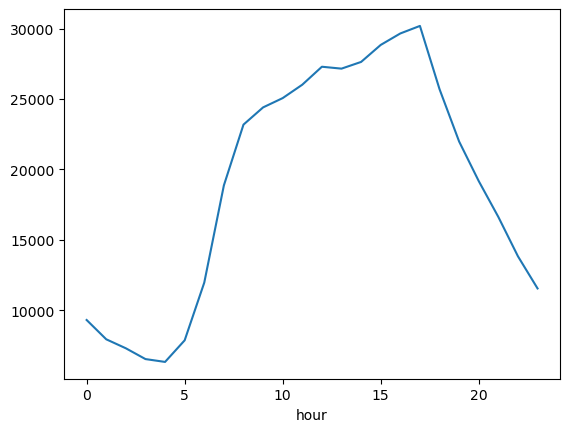

In [59]:
df.groupby(['hour'])['time_stamp_x'].count().plot(kind='line')

From the above line chart which represents the the distribution of orders in each hour, it is understood that the number of orders are rising till 5pm and then the number of orders are decreasing. So I reccomend the owner to hire more workers who generally works from 6am to 5pm where the number of orders are high and a few workers from 5pm..

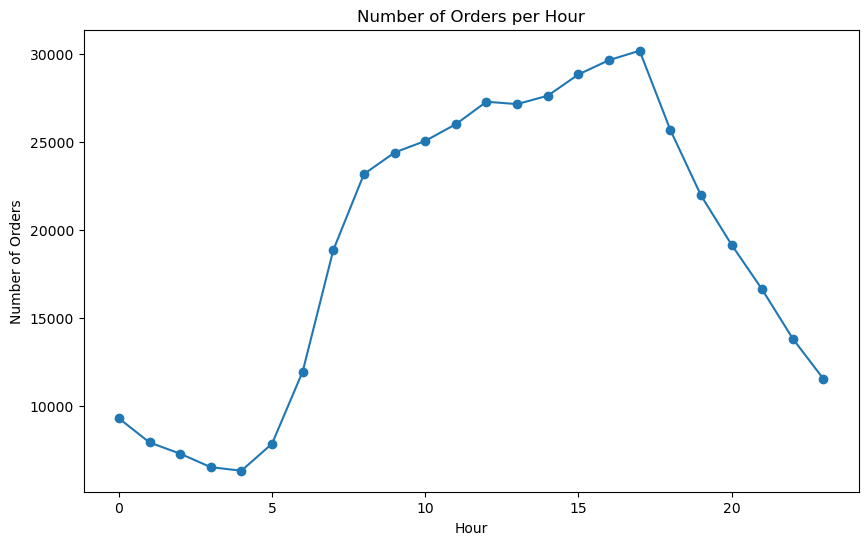

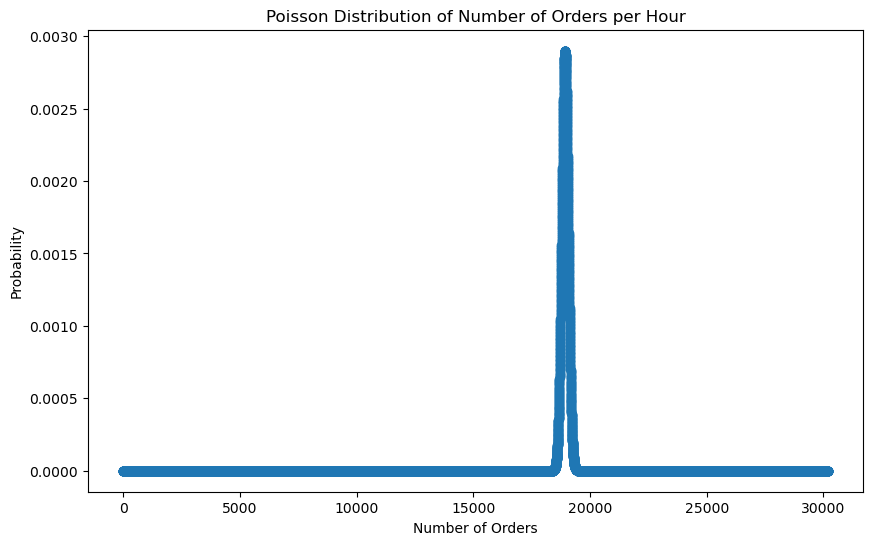

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson



# Convert the 'time_stamp_x' column to datetime format
df['time_stamp_x'] = pd.to_datetime(df['time_stamp_x'])

# Extract the hour from the 'time_stamp_x' column
df['hour'] = df['time_stamp_x'].dt.hour

# Count the number of orders in each hour
orders_per_hour = df['hour'].value_counts().sort_index()

# Plot the number of orders per hour
plt.figure(figsize=(10,6))
plt.plot(orders_per_hour.index, orders_per_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')
plt.show()

# Fit a Poisson distribution to the number of orders per hour
mu = np.mean(orders_per_hour.values)
poisson_dist = poisson(mu)

# Plot the Poisson distribution
x = np.arange(0, max(orders_per_hour.values) + 1)
y = poisson_dist.pmf(x)
plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.xlabel('Number of Orders')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Number of Orders per Hour')
plt.show()

In [ ]:
The problem for the owner of the Pizza Store that can be solved by modeling the number of orders incoming each hour is determining the optimal number of staff to have on duty at each hour.
By using the Poisson distribution, the owner can calculate the probability of a certain number of orders arriving in a given hour and plan accordingly.
For example, if the owner wants to ensure that they have enough staff to handle 90% of the orders that arrive in a given hour, they can use the Poisson distribution to calculate the required number of staff.